#### **Covid-19 in Italy**. Hospitalizations (=ricoveri)

**Import libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from custom.plot_utils import get_xticks_labels

**Read the xlsx file provided by ISS**.

PS: install openpyxl to read the xlsx file

In [2]:
url = "https://www.epicentro.iss.it/coronavirus/open-data/covid_19-iss.xlsx"
xlsx = pd.ExcelFile(url)
print(xlsx.sheet_names)

['Nota metodologica', 'Contenuto', 'casi_prelievo_diagnosi', 'casi_inizio_sintomi', 'casi_inizio_sintomi_sint', 'casi_regioni', 'casi_provincie', 'ricoveri', 'decessi', 'sesso_eta', 'stato_clinico']


- Selected sheets: 'ricoveri' (hospitalizations)
- iss_date = last updated date
- DATARICOVERO1 = dates (set as index)
- RICOVERI = hospitalizations

In [3]:
df = pd.read_excel(xlsx,
                   sheet_name="ricoveri")

# Select the rows where date is not nan
df.dropna(subset=["DATARICOVERO1"], inplace=True)
df.index = pd.to_datetime(df["DATARICOVERO1"], infer_datetime_format=True)
# Convert to numerical values
df["RICOVERI"] = pd.to_numeric(df["RICOVERI"], errors="coerce")

**Calculate 7 day moving average**

In [4]:
df["RICOVERI 7 day avg"] = df["RICOVERI"].rolling(window=7, min_periods=1).mean()

**Plot new hospitalizations/7 day moving average**

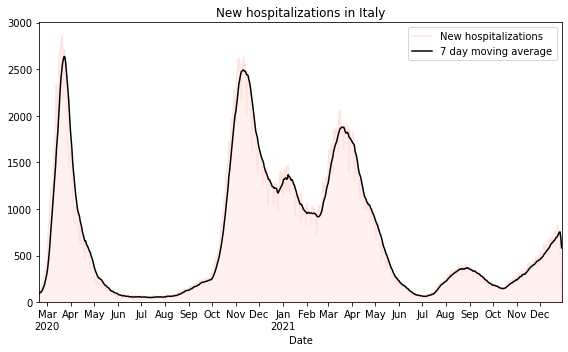

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(df.index,
        df["RICOVERI"],
        c="mistyrose",
        label="New hospitalizations")
ax.plot(df.index,
        df["RICOVERI 7 day avg"],
        c="k",
        label="7 day moving average")

ax.set_title("New hospitalizations in Italy")
ax.set_xlabel("Date")

# get x ticks, labels
ticks, labels = get_xticks_labels(df.index)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.legend()

ax.fill_between(x=df.index, y1=df["RICOVERI"], color="mistyrose", alpha=0.5)

ax.margins(x=0)
ax.set_ylim(0, )

fig.tight_layout()
plt.show()